# Lab 6 -  Model comparison

In this excercise we will learn about comparing models using metrics predicting out of sample behavior.

Main idea is to instead of splitting the dataset into two parts (test and training set) to estimate how model would behave in presence of new data.
This is being done by evaluating so called *log likelihood* which is an array of values of logarithm of likelihood for each of datapoints individually.

We will use this informations with two metrics:
- Watanabe-Akaike Information Criterion (also known as Widely Applicable Information Criterion, WAIC), which is averages log likelihood and estimates the effective number of paraemeters in the model
- PSIS-LOOCV - Pareto Smoothed Importance Sampling Leave-one-out Cross Validation. It is an estimate of value obtained from Leave-one-out Cross Validation by using modified importance sampling method instead of running inference N times where N is number of samples, leaving one each time. 

For this excercise code is provided in form of print-screens.


In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



## Excercise 1 - generate data

F - number of letters in first name  
L - number of letters in last name  
N = (L+F)*100

1. Compile code_1.stan and  code_2.stan 
2. Generate data for rest of excercises.

In [37]:
# Get N from number of letters in first+last names
F = len('Krzysztof')
L = len('Kordal')
N = (F + L) * 100

# 1.1 Compile model
model_1 = CmdStanModel(stan_file='stan_codes/code_1.stan')
data_1 = model_1.sample(data={'N' : N},
                        iter_sampling=1,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True,
                        seed=20042023)

# 1.2 Get DataFrame (without unnecessary data)
df_1 = data_1.draws_pd().iloc[0, 3:]
display(df_1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


y[1]       -1.285740
y[2]       15.736800
y[3]       -0.607976
y[4]        0.850032
y[5]        1.690140
             ...    
y[1496]     0.870684
y[1497]    -0.405963
y[1498]    -1.199430
y[1499]    -0.722016
y[1500]     1.098920
Name: 0, Length: 1500, dtype: float64

In [38]:
# 1.1 Compile model
model_2 = CmdStanModel(stan_file='stan_codes/code_2.stan')
data_2 = model_2.sample(data={'N' : N},
                        iter_sampling=1,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True,
                        seed=20042023)

# 1.2 Get DataFrame (without unnecessary data)
df_2 = data_2.draws_pd().iloc[0, 2:]
display(df_2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


X[1,1]    -1.285740
X[2,1]     0.847453
X[3,1]    -0.842450
X[4,1]    -1.221220
X[5,1]     1.242760
             ...   
y[1496]    3.036490
y[1497]   -1.277630
y[1498]    0.142449
y[1499]    3.077670
y[1500]   -2.234450
Name: 0, Length: 7503, dtype: float64


## Excercise 2 - compare normal and student models for data from first file

1. Compile both models
2. Fit both models
3. Using az.compare and az.plot_compare analyze both models using ```loo``` and ```waic``` criteria. 


In [8]:
# 2.1-2.2 Compiling and fitting both models
## Normal model
model_3_normal = CmdStanModel(stan_file='stan_codes/code_3.stan')
data_3_normal = model_3_normal.sample(data={'N': N, 'y': df_1},
                                      seed=20042023)
## Student model
model_4_student=CmdStanModel(stan_file='stan_codes/code_4.stan')
data_4_student = model_4_student.sample(data={'N': N, 'y': df_1},
                                        seed=20042023)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:05 Sampling completed             


INFO:cmdstanpy:CmdStan done processing.


In [10]:
# 2.3 Extracting for use with Arviz
az_data_3_normal = az.from_cmdstanpy(posterior=data_3_normal)
az_data_4_student = az.from_cmdstanpy(posterior=data_4_student)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student,0,-2292.193937,4.607304,0.000000,1.000000e+00,44.043171,0.000000,False,log
normal,1,-2951.090988,40.277270,658.897051,4.035883e-10,188.608174,159.900188,True,log


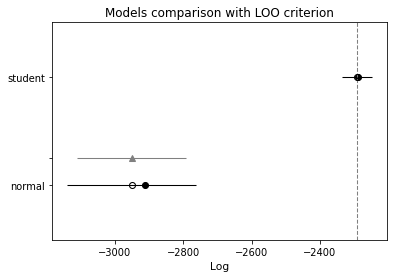

In [17]:
# 2.3 LOO criteria comparison
loo_compare = az.compare(compare_dict={'normal': az_data_3_normal,
                                       'student': az_data_4_student},
                         ic='loo')

# Comparison table
display(loo_compare)

# Plotting
fig, ax = plt.subplots(1, 1)
az.plot_compare(loo_compare, ax=ax)
ax.set(title='Models comparison with LOO criterion')
plt.show()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student,0,-2292.192687,4.606054,0.000000,1.000000e+00,44.042841,0.000000,True,log
normal,1,-2953.536630,42.722912,661.343942,5.348681e-09,190.054212,161.408498,True,log


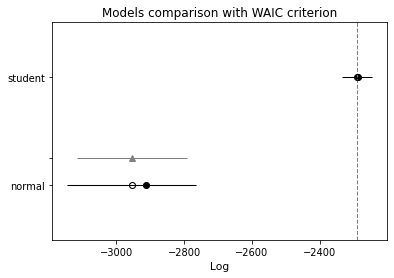

In [16]:
# 2.3 WAIC criteria comparison
waic_compare = az.compare(compare_dict={'normal': az_data_3_normal,
                                        'student': az_data_4_student},
                          ic='waic')

# Comparison table
display(waic_compare)

# Plotting
fig, ax = plt.subplots(1, 1)
az.plot_compare(waic_compare, ax=ax)
ax.set(title='Models comparison with WAIC criterion')
plt.show()

In both criteria comparisons student model is better for predicting new data - smaller ELPD values (based on documentation).


### Excercise 3 - compare models with different numbers of predictors

1. Compile model
2. Compare models for 1, 2 and 3 predictors as in previous excercise


In [46]:
# 3.1 Compile model
model_5 = CmdStanModel(stan_file='stan_codes/code_5.stan')

# Extract [X] (matrix) and [y]
X1 = np.array(df_2.iloc[0:1500])
X2 = np.array(df_2.iloc[1500:3000])
X3 = np.array(df_2.iloc[3000:4500])
y = np.array(df_2.iloc[-N:])

# 3.2 Fit models
## 1 predictor
predictors_1 = model_5.sample(data={'N' : N,
                              'K' : 1,
                              'y' : y.reshape(N),
                              'X' : X1.reshape(N,1)
                              },
                        seed=20042023)
## 2 predictors
predictors_2 = model_5.sample(data={'N' : N,
                              'K' : 2,
                              'y' : y.reshape(N),
                              'X' : np.array([X1, X2]).reshape(N,2)
                              },
                        seed=20042023)
## 3 predictors
predictors_3 = model_5.sample(data={'N' : N,
                              'K' : 3,
                              'y' : y.reshape(N),
                              'X' : np.array([X1, X2, X3]).reshape(N,3)
                              },
                        seed=20042023)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)






chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed           


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:04 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |██████████| 00:06 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:05 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |█████████▌| 00:06 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:08 Iteration: 19


INFO:cmdstanpy:CmdStan done processing.


In [47]:
# Extracting for use with Arviz
az_predictors_1 = az.from_cmdstanpy(predictors_1)
az_predictors_2 = az.from_cmdstanpy(predictors_2)
az_predictors_3 = az.from_cmdstanpy(predictors_3)

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Predictors-1,0,-2729.569345,2.110114,0.000000,0.991836,28.674092,0.000000,False,log
Predictors-3,1,-3496.905512,3.970863,767.336167,0.000000,27.594292,32.477926,False,log
Predictors-2,2,-3498.915092,2.856683,769.345747,0.008164,27.491621,32.569315,False,log


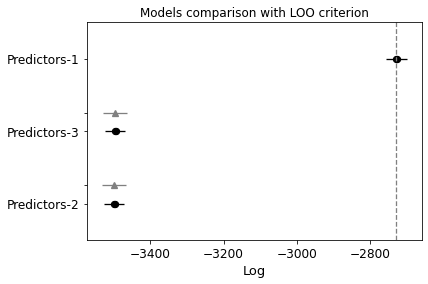

In [48]:
# 3.2 LOO criteria comparison
loo_compare = az.compare(compare_dict={'Predictors-1': az_predictors_1,
                                       'Predictors-2': az_predictors_2,
                                       'Predictors-3': az_predictors_3},
                         ic='loo')

# Comparison table
display(loo_compare)

# Plotting
fig, ax = plt.subplots(1, 1)
az.plot_compare(loo_compare, ax=ax)
ax.set(title='Models comparison with LOO criterion')
plt.show()

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Predictors-1,0,-2729.569557,2.110325,0.000000,0.991836,28.674128,0.000000,False,log
Predictors-3,1,-3496.905529,3.970880,767.335972,0.000000,27.594287,32.477950,False,log
Predictors-2,2,-3498.914960,2.856552,769.345404,0.008164,27.491605,32.569342,False,log


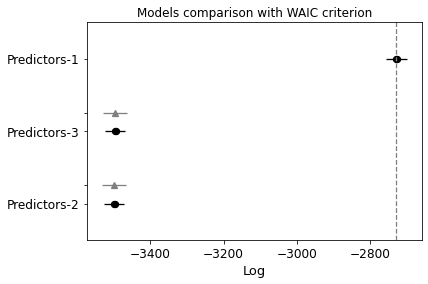

In [49]:
# 3.2 WAIC criteria comparison
waic_compare = az.compare(compare_dict={'Predictors-1': az_predictors_1,
                                        'Predictors-2': az_predictors_2,
                                        'Predictors-3': az_predictors_3},
                          ic='waic')

# Comparison table
display(waic_compare)

# Plotting
fig, ax = plt.subplots(1, 1)
az.plot_compare(waic_compare, ax=ax)
ax.set(title='Models comparison with WAIC criterion')
plt.show()

In both cases (comparison methods) model behaves similarily - for 1 predictor is better than for 2 and 3.